# Task 2 — Stock Close Prediction: Linear Regression & Random Forest




## Problem Statement & Goal

Predict next-day or same-day stock Close price using historical Open, High, Low, Volume, and previous Close. Demonstrate basic ML workflow: data download, feature engineering, model training, evaluation, and visualisation.

## Environment Setup



Install required libraries. In Colab this will install yfinance if missing.

In [1]:
!pip install --quiet yfinance pandas scikit-learn matplotlib seaborn

## Download Historical Data



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Choose ticker and period
TICKER = 'AAPL'  # change as needed
PERIOD = '2y'

df = yf.download(TICKER, period=PERIOD, auto_adjust=True)
df = df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-11-28,188.618652,189.292298,187.628008,188.004458,38415400
1,2023-11-29,187.598328,190.292882,187.202076,189.114012,43014200
2,2023-11-30,188.172913,188.539461,186.429384,188.063941,48794400
3,2023-12-01,189.450836,189.767835,187.459631,188.549346,45704800
4,2023-12-04,187.657761,188.271970,185.696289,188.202618,43389500


## Feature Engineering



In [3]:
# Create previous close as a feature and drop NA
df['PrevClose'] = df['Close'].shift(1)
df = df.dropna().reset_index(drop=True)
features = ['Open','High','Low','Volume','PrevClose']
X = df[features]
y = df['Close']

print('Feature sample:')
X.head()

Feature sample:


Price,Open,High,Low,Volume,PrevClose
Ticker,AAPL,AAPL,AAPL,AAPL,
0,189.114012,190.292882,187.202076,43014200,188.618652
1,188.063941,188.539461,186.429384,48794400,187.598328
2,188.549346,189.767835,187.459631,45704800,188.172913
3,188.202618,188.271970,185.696289,43389500,189.450836
4,188.430483,192.581270,188.400750,66628400,187.657761


## Train Models & Evaluate



In [4]:
# Train-test split (time-ordered)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Metrics
def report(y_true, y_pred):
    return {'MSE': mean_squared_error(y_true,y_pred), 'MAE': mean_absolute_error(y_true,y_pred), 'R2': r2_score(y_true,y_pred)}

print('Linear Regression:', report(y_test, y_pred_lr))
print('Random Forest   :', report(y_test, y_pred_rf))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression: {'MSE': 1.5576266752342218, 'MAE': 0.9250202683037986, 'R2': 0.9969175210273287}
Random Forest   : {'MSE': 59.62581484067145, 'MAE': 4.688280704611596, 'R2': 0.8820029706751604}


## Visualize Predictions



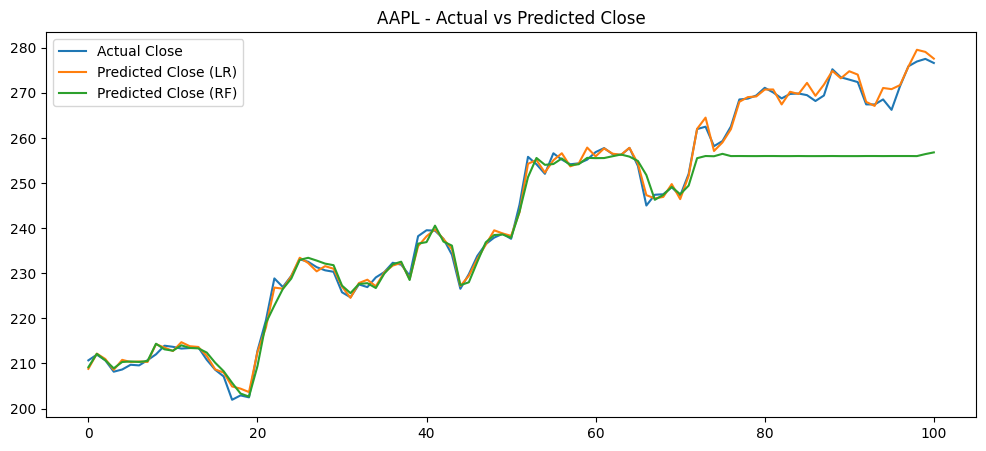

In [5]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[-120:], label='Actual Close')
plt.plot(y_pred_lr[-120:], label='Predicted Close (LR)')
plt.plot(y_pred_rf[-120:], label='Predicted Close (RF)')
plt.title(f'{TICKER} - Actual vs Predicted Close')
plt.legend()
plt.show()

## Results & Final Notes



**Interpretation & next steps:**

- The basic models illustrate the workflow; Random Forest often gives better fit but may overfit.
- For production: use time-series validation (walk-forward), add technical indicators (moving averages, RSI), and tune hyperparameters.
- If *next day* is to be predicted explicitly, set target to `df['Close'].shift(-1)` and drop the last row before training.